# Heat Transfer II
February 26th, 2025

Data analysis & Comsol post-processing by Alex Quemel, Rahil Shaik, Sneha Kancharla, and Ethan Mibu

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
from IPython.display import display, HTML
from numpy.polynomial import Polynomial
import warnings
warnings.filterwarnings('ignore')

In [3]:
k = 120 #Thermal conductivity of brass in W/mK

data = {
    'Flow Rate (SCFM)': [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4],
    'Thermistor #': [4, 5, 6, 4, 5, 6, 4, 5, 6, 4, 5, 6],
    'Temperature 1 (°C)': [115.8, 113.6, 111.7, 113.3, 110.8, 108.4, 112.0, 109.1, 106.3, 109.0, 106.8, 104.1],
    'Temperature 2 (°C)': [116.2, 114.8, 112.7, 116.0, 113.9, 111.1, 115.7, 113.2, 110.1, 115.1, 112.0, 108.5],
    'Temperature 3 (°C)': [None, None, None, 115.8, 113.4, 111.0, 114.7, 111.8, 108.7, None, None, None],
}

df = pd.DataFrame(data)
df['Avg Temp (°C)'] = df[['Temperature 1 (°C)', 'Temperature 2 (°C)', 'Temperature 3 (°C)']].mean(axis=1)

Avg_Power = np.array([35.495, 42.33333333, 44.83333333, 45.13333333])
distances = np.array([0.0177, 0.0431, 0.0685]) #Distances through brass rod (m)
set_temp = 133 #Thermocouple temp (°C)
df

,Flow Rate (SCFM),Thermistor #,Temperature 1 (°C),Temperature 2 (°C),Temperature 3 (°C),Avg Temp (°C)
0,1,4,115.8,116.2,NaN,116.000000
1,1,5,113.6,114.8,NaN,114.200000
2,1,6,111.7,112.7,NaN,112.200000
3,2,4,113.3,116.0,115.8,115.033333
4,2,5,110.8,113.9,113.4,112.700000
5,2,6,108.4,111.1,111.0,110.166667
6,3,4,112.0,115.7,114.7,114.133333
7,3,5,109.1,113.2,111.8,111.366667
8,3,6,106.3,110.1,108.7,108.366667
9,4,4,109.0,115.1,NaN,112.050000


## Question 2

From an appropriate plot of your thermistor data, obtain the convective heat-transfer
coefficient at the end of the rod, h, for all air flow rates. Fit your data utilizing the method
you determine most appropriate to extrapolate the temperature and its gradient at the
brass-rod face.

$$q_s = h\Delta T$$

$$q = -k\nabla T$$

$$h = \frac{-k_{brass}(\frac{dT}{dx})}{T_{surface}-T_{air}}$$

<Figure size 800x600 with 0 Axes>

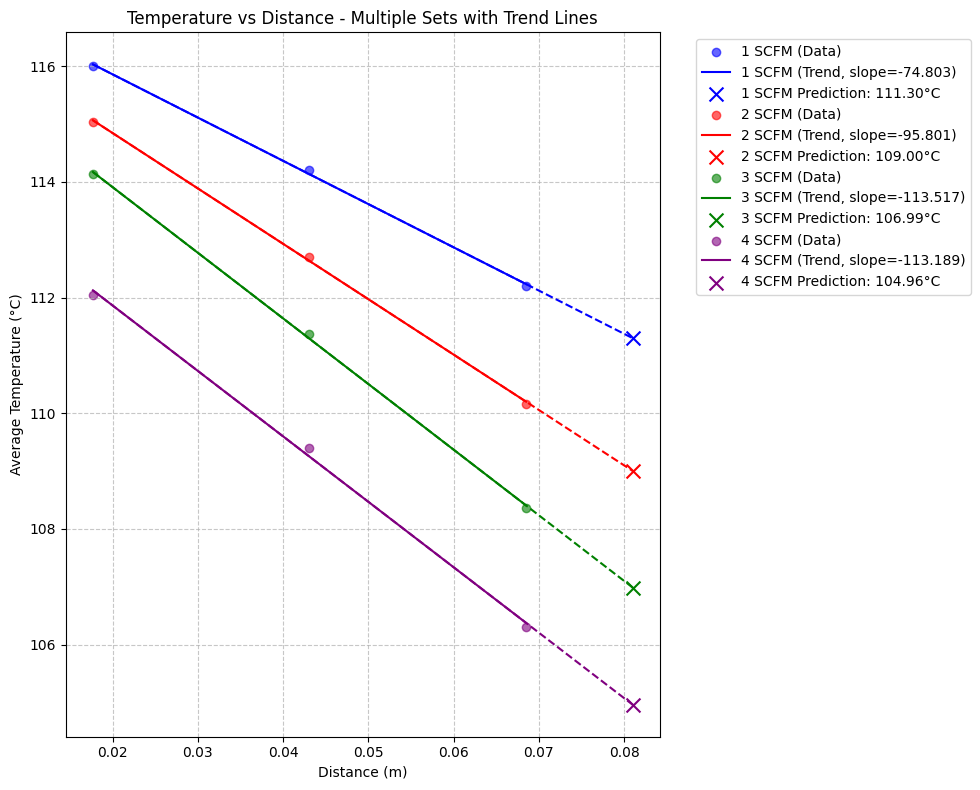

[-74.80314960629914, -95.80052493438333, -113.51706036745402, -113.18897637795274]


In [4]:
plt.figure(figsize=(8, 6))

avg_temps1SCFM = df['Avg Temp (°C)'][0:3]
avg_temps2SCFM = df['Avg Temp (°C)'][3:6]
avg_temps3SCFM = df['Avg Temp (°C)'][6:9]
avg_temps4SCFM = df['Avg Temp (°C)'][9:]
avg_temps = [avg_temps1SCFM, avg_temps2SCFM, avg_temps3SCFM, avg_temps4SCFM]

target_distance = 0.081
predictions = np.zeros(len(avg_temps))

colors = ['blue', 'red', 'green', 'purple']
labels = ['1 SCFM', '2 SCFM', '3 SCFM', '4 SCFM']

dT_dz = []
plt.figure(figsize=(10, 8))

for i, temps in enumerate(avg_temps):
    plt.scatter(distances, temps, color=colors[i], alpha=0.6, label=f'{labels[i]} (Data)')

    slope, intercept, r_value, p_value, std_err = stats.linregress(distances, temps)
    dT_dz.append(slope)
    line = slope * np.array(distances) + intercept
    plt.plot(distances, line, color=colors[i], linestyle='-', 
             label=f'{labels[i]} (Trend, slope={slope:.3f})')
    predictions[i] = slope * target_distance + intercept

    x_extended = np.append([target_distance], distances)
    x_extended.sort()  # Sort to ensure proper line plotting
    
    # Plot extended trend line
    line_extended = slope * x_extended + intercept
    plt.plot(x_extended, line_extended, color=colors[i], linestyle='--')
    plt.scatter(target_distance, predictions[i], color=colors[i], marker='x', s=100,
               label=f'{labels[i]} Prediction: {predictions[i]:.2f}°C')

plt.xlabel('Distance (m)')
plt.ylabel('Average Temperature (°C)')
plt.title('Temperature vs Distance - Multiple Sets with Trend Lines')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

dT_dz = [float(slope) for slope in dT_dz]
print(dT_dz)

### Calculation of h

$$h = \frac{-k_{brass}(\frac{dT}{dx})}{T_{surface}-T_{air}}$$
where $k_{brass}$ is the thermal conductivity of brass, $\frac{dT}{dz}$ is the temperature gradient, $h$ is the convective heat transfer coefficient $[W/m^2/K]$, and $\Delta T$ is the temperature difference $[K]$ between the surface and bulk fluid $(T_s-T_e)$.

In [5]:
T_s = predictions
T_e = 20.6 # C
A_cross = np.pi * (0.025 / 2) **2
h = [-k * dT_dz[i] / (T_s[i] - T_e) for i in range(len(T_s))]

print('Heat transfer coefficients are:', h) 

Heat transfer coefficients are: [np.float64(98.96964496810249), np.float64(130.042293435388), np.float64(157.68705398907983), np.float64(161.00823825485736)]


### Values we have calculated so far

In [6]:
calc_data = {
    'Flow Rate (SCFM)': [1, 2, 3, 4],
    'Air Velocity (m/s)': [0.5942230889,1.188446178,1.782669267,2.376892355],
    'T_surface (°C)': T_s,
    '(T_surface - T_air) (°C)': T_s - T_e,
    'dT/dx (°C/m)': dT_dz,
    'h (W/m²K)': h,
}
calc_vals_df = pd.DataFrame(calc_data)
calc_vals_df

,Flow Rate (SCFM),Air Velocity (m/s),T_surface (°C),(T_surface - T_air) (°C),dT/dx (°C/m),h (W/m²K)
0,1,0.594223,111.298294,90.698294,-74.803150,98.969645
1,2,1.188446,109.002493,88.402493,-95.800525,130.042293
2,3,1.782669,106.986592,86.386592,-113.517060,157.687054
3,4,2.376892,104.960138,84.360138,-113.188976,161.008238


In [7]:
df_values = pd.merge(df, calc_vals_df[['Flow Rate (SCFM)', 'h (W/m²K)']], on='Flow Rate (SCFM)', how='left')

df_values

,Flow Rate (SCFM),Thermistor #,Temperature 1 (°C),Temperature 2 (°C),Temperature 3 (°C),Avg Temp (°C),h (W/m²K)
0,1,4,115.8,116.2,NaN,116.000000,98.969645
1,1,5,113.6,114.8,NaN,114.200000,98.969645
2,1,6,111.7,112.7,NaN,112.200000,98.969645
3,2,4,113.3,116.0,115.8,115.033333,130.042293
4,2,5,110.8,113.9,113.4,112.700000,130.042293
5,2,6,108.4,111.1,111.0,110.166667,130.042293
6,3,4,112.0,115.7,114.7,114.133333,157.687054
7,3,5,109.1,113.2,111.8,111.366667,157.687054
8,3,6,106.3,110.1,108.7,108.366667,157.687054
9,4,4,109.0,115.1,NaN,112.050000,161.008238


## Question 3
Calculate the axial heat flux leaving the brass-rod face. Estimate the overall radial heat-
transfer coefficient, U, between the brass rod and the surrounding air. You must consider
what heat-transfer resistances exist between the rod and the air. How does the magnitude
of your estimated U compare to the values of heater power input and h measured at the
rod face? What can you say about the energy balance of this system? Identify the sources
of heat loss. When estimating the axial heat flux, what is the most appropriate value for
the length of the cylinder (should you include or exclude the section with the heater)?

### Calculating Axial Heat Flux
Use Fourier's Law:
$$q_{axial} = -k(\frac{dT}{dz})$$
where $k$ = thermal conductivity of brass, $\frac{dT}{dx}$= temperature gradient

In [8]:
k_brass = 120 #W/m·K (thermal conductivity of brass)
rod_diameter = 0.025  #meters, m
rod_length = 0.081 #meters, m
T_e = 20.6 # C
A_cross
surface_area = 2*np.pi * (rod_diameter/2 )* rod_length + 2*np.pi* (rod_diameter/2)**2 # m^2
num_flows = len(predictions)

axial_heat_flux = np.zeros(num_flows)
Q_axial = np.zeros(num_flows)

for i in range(num_flows):
    axial_heat_flux[i] = -k_brass * dT_dz[i]
    Q_axial[i] = axial_heat_flux[i] * A_cross

print("\nAxial Heat Flux Results:")
for i in range(len(axial_heat_flux)):
    print(f"{labels[i]}:")
    print(f"Heat Flux: {axial_heat_flux[i]:.2f} W/m²")
    print(f"Total Axial Heat Transfer: {Q_axial[i]:.2f} W")


Axial Heat Flux Results:
1 SCFM:
Heat Flux: 8976.38 W/m²
Total Axial Heat Transfer: 4.41 W
2 SCFM:
Heat Flux: 11496.06 W/m²
Total Axial Heat Transfer: 5.64 W
3 SCFM:
Heat Flux: 13622.05 W/m²
Total Axial Heat Transfer: 6.69 W
4 SCFM:
Heat Flux: 13582.68 W/m²
Total Axial Heat Transfer: 6.67 W


### Estimating Overal Radial Heat-Transfer Coefficient, U 

Sources of Heat Loss:
* Radial heat loss through the insulation
* End losses at the brass-rod face
* Assuming no heat loss other than axial or radial

Resistances to heat transfer from rod to air:
* High conductivity means low resistance for conduction through brass
* Convection from surface to air is main source of resistance

Overall energy balance equation:
$$Q_{in}=Q_{axial} + Q_{radial} + Q_{losses}$$

Assuming no heat loss, we can cancel Q_losses
$$Q_{in}=Q_{axial} + Q_{radial}$$
$$Q_{radial}=Q_{in} - Q_{axial} $$

$$U_{radial} = \frac {Q_{in}- Q_{axial}} {SA(T_{surf} - T_{air})} $$


In [9]:
Q_in = Avg_Power
U =  (Q_in - Q_axial) / (surface_area*(T_s - T_e))
print('The overall radial heat transfer coefficient at each flow rate is:', U)

The overall radial heat transfer coefficient at each flow rate is: [46.67694047 56.51767253 60.13236743 62.0922955 ]


The estimated U values are larger than the heater power input and larger than the h measured at the rod face. But the magnitudes are similar between U and h values. When estimating axial heat flux, you should exclude the section with the heater.

### Calculated values table

In [10]:
calc_vals_df = pd.DataFrame(calc_data)
calc_vals_df['U (W/m² K)'] = U
calc_vals_df['Axial Heat Flux (W/m²)'] = axial_heat_flux
calc_vals_df

,Flow Rate (SCFM),Air Velocity (m/s),T_surface (°C),(T_surface - T_air) (°C),dT/dx (°C/m),h (W/m²K),U (W/m² K),Axial Heat Flux (W/m²)
0,1,0.594223,111.298294,90.698294,-74.803150,98.969645,46.676940,8976.377953
1,2,1.188446,109.002493,88.402493,-95.800525,130.042293,56.517673,11496.062992
2,3,1.782669,106.986592,86.386592,-113.517060,157.687054,60.132367,13622.047244
3,4,2.376892,104.960138,84.360138,-113.188976,161.008238,62.092296,13582.677165


## Question 4
Compare the values of the heat-transfer coefficient to values from texts, handbooks, or
references of appropriate heat-transfer correlations. Use (at least) one correlation to
predict the heat transfer coefficient under the experimental conditions (i.e. dimensionless
quantities). Are the geometry and flow conditions in the experiment within the ranges
specified for the chosen correlation? If not, what effect do you expect this to have on the
agreement between experiment and correlation?

Compared to the heat-transfer coefficients from "Experimental study and theoretical analysis of local heat transfer distribution between smooth flat surface and impinging air jet from a circular straight pipe nozzle," our calculated heat-transfer coefficients are of consistent magnitude. The values range from 80 to 170 $[\frac{W}{m^2 K}]$.

### Calculating the heat transfer coefficient using dimensionless quantities
#### Local Reynolds Number ####
$$Re_{r}=\frac{\rho u r}{\mu} = \frac{u r}{\nu}$$
where $\rho$ = density of air, $u$ = fluid velocity, $\mu$ = dynamic fluid viscosity, $\nu$ = kinematic fluid viscosity

#### Prandtl Number
$$Pr = \frac{\nu}{\alpha} = \frac{\mu c_{p}}{k}$$
where $\nu$ = kinematic fluid viscosity, $\alpha$ = thermal diffusivity

#### Nusselt Number
$$Nu = \frac{hL}{k}$$

#### Stanton Number 
$$St = \frac{h}{\rho \nu c_{p}} = \frac{Nu}{RePr}$$

In [11]:
def Reynolds(velocity, length, kinematic_viscosity):
    return velocity * length / kinematic_viscosity

air_velocity = calc_vals_df['Air Velocity (m/s)']
radial_length = 0.0125 #m
kin_viscosity_air = 1.51 * 10**-5 #m^2/s
Reynolds_vals = Reynolds(air_velocity, radial_length, kin_viscosity_air)
Reynolds_vals

def Prandtl(momentum_diffusivity, thermal_diffusivity):
    return momentum_diffusivity / thermal_diffusivity

rho_air = 1.203 # kg/m^3
c_p = 1005 # J/kg·K
k_air = 0.025 #W/m*K
alpha = k_air / (rho_air*c_p)

Prandtl_val = Prandtl(kin_viscosity_air, alpha)

def Nus_correl(Re,Pr):
    return 1.54 * Re**(1/2) * Pr**(1/3)

Nu_L = Nus_correl(Reynolds_vals, Prandtl_val)
Nu_L

h = Nu_L * k_air / radial_length
h


0     61.515074
1     86.995452
2    106.547234
3    123.030149
Name: Air Velocity (m/s), dtype: float64

In [12]:
# df_values = pd.merge(df, calc_vals_df[['Flow Rate (SCFM)', 'h (W/m²K)']], on='Flow Rate (SCFM)', how='left') # all raw data + h values
# df_values

air_velocity = calc_vals_df['Air Velocity (m/s)']
radial_length = 0.0125 #m
kin_viscosity_air = 1.51 * 10**-5 #m^2/s
Reynolds_vals = Reynolds(air_velocity, radial_length, kin_viscosity_air)

def Reynolds(velocity, length, kinematic_viscosity):
    return velocity * length / kinematic_viscosity

def Prandtl(momentum_diffusivity, thermal_diffusivity):
    return momentum_diffusivity / thermal_diffusivity

def Nus_correl(Re, Pr):
    return 1.54 * Re**(1/2) * Pr**(1/3) #brdlik and savin prelab question question 3 or in additional resources textbook references

results = []
prandtl_number = Prandtl(kin_viscosity_air, alpha)

for flow_rate, velocity in zip(df["Flow Rate (SCFM)"], calc_vals_df['Air Velocity (m/s)']):
    reynolds_number = Reynolds(velocity, radial_length, kin_viscosity_air)
    nusselt_number = Nus_correl(reynolds_number, prandtl_number)
    heat_transfer_coeff = nusselt_number * k_air / radial_length
    
    results.append({
        'Flow Rate (SCFM)': flow_rate,
        'Air Velocity (m/s)': velocity,
        'Reynolds Number': reynolds_number,
        'Prandtl Number': prandtl_number,
        'Nusselt Number': nusselt_number,
        'Heat Transfer Coefficient (W/m²·K)': heat_transfer_coeff
    })

dimensionless_df = pd.DataFrame(results)

dimensionless_df

,Flow Rate (SCFM),Air Velocity (m/s),Reynolds Number,Prandtl Number,Nusselt Number,Heat Transfer Coefficient (W/m²·K)
0,1,0.594223,491.906531,0.730245,30.757537,61.515074
1,1,1.188446,983.813061,0.730245,43.497726,86.995452
2,1,1.782669,1475.719592,0.730245,53.273617,106.547234
3,2,2.376892,1967.626122,0.730245,61.515074,123.030149


## Question 5
Determine the scaling of the experimental heat-transfer coefficient with jet velocity or,
equivalently, the scaling of the Nusselt number with the Reynolds number. Plot the data
in a way that the scaling exponent can be determined graphically. How does the scaling
exponent obtained experimentally compare to that predicted by the correlations?


In [13]:
calc_vals_df

,Flow Rate (SCFM),Air Velocity (m/s),T_surface (°C),(T_surface - T_air) (°C),dT/dx (°C/m),h (W/m²K),U (W/m² K),Axial Heat Flux (W/m²)
0,1,0.594223,111.298294,90.698294,-74.803150,98.969645,46.676940,8976.377953
1,2,1.188446,109.002493,88.402493,-95.800525,130.042293,56.517673,11496.062992
2,3,1.782669,106.986592,86.386592,-113.517060,157.687054,60.132367,13622.047244
3,4,2.376892,104.960138,84.360138,-113.188976,161.008238,62.092296,13582.677165


Slope: 0.3707
Standard Error of Slope: 0.0422
Y-intercept: 2.0844
R-squared: 0.9747
P-value: 0.0127
Standard Deviation of Residuals: 0.0135


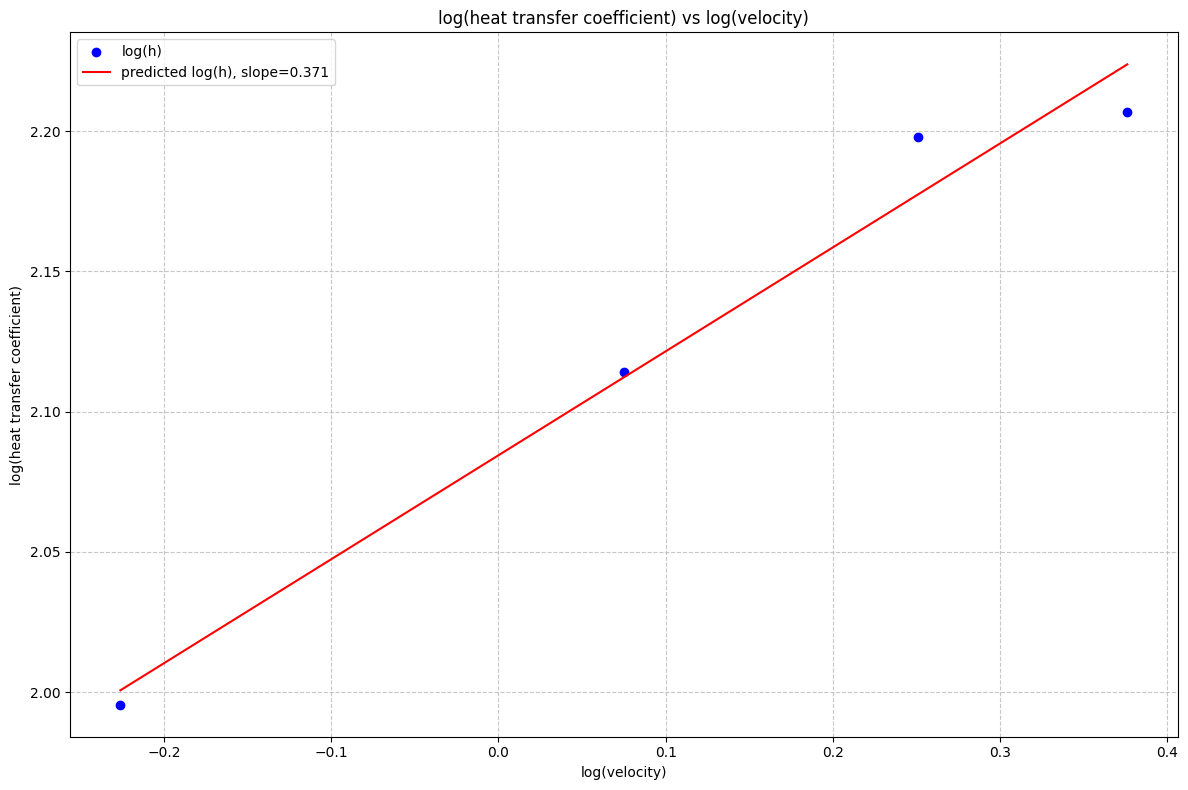

In [14]:
calc_vals_df['log(h)'] = np.log10(calc_vals_df['h (W/m²K)'])
calc_vals_df['log(u)'] = np.log10(calc_vals_df['Air Velocity (m/s)'])
calc_vals_df

slope, intercept, r_value, p_value, std_err = stats.linregress(calc_vals_df['log(u)'], calc_vals_df['log(h)'])
line = slope * calc_vals_df['log(u)'] + intercept

plt.figure(figsize=(12, 8))
plt.scatter(calc_vals_df['log(u)'], calc_vals_df['log(h)'], color='blue', label='log(h)')
plt.plot(calc_vals_df['log(u)'], line, color='red', label=f'predicted log(h), slope={slope:.3f}')

plt.title('log(heat transfer coefficient) vs log(velocity)')
plt.xlabel('log(velocity)')
plt.ylabel('log(heat transfer coefficient)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

print(f"Slope: {slope:.4f}")
print(f"Standard Error of Slope: {std_err:.4f}")
print(f"Y-intercept: {intercept:.4f}")
print(f"R-squared: {r_value**2:.4f}")
print(f"P-value: {p_value:.4f}")

residuals = calc_vals_df['log(h)'] - line
std_dev = np.std(residuals)
print(f"Standard Deviation of Residuals: {std_dev:.4f}")

plt.tight_layout()
plt.show()

#### Scaling of the experimental heat transfer coefficient with jet velocity
$$h \ \alpha \ u^{0.3707±0.0422}$$
#### The scaling exponent predicted by correlations is 
$$ Nu \ \alpha \ Re ^ {0.5} $$

#### Let's plot this as well to see how the relationship compares

In [15]:
dimensionless_df

,Flow Rate (SCFM),Air Velocity (m/s),Reynolds Number,Prandtl Number,Nusselt Number,Heat Transfer Coefficient (W/m²·K)
0,1,0.594223,491.906531,0.730245,30.757537,61.515074
1,1,1.188446,983.813061,0.730245,43.497726,86.995452
2,1,1.782669,1475.719592,0.730245,53.273617,106.547234
3,2,2.376892,1967.626122,0.730245,61.515074,123.030149


Slope: 0.0207
Standard Error of Slope: 0.0015
Y-intercept: 21.7489
R-squared: 0.9902
P-value: 0.0049
Standard Deviation of Residuals: 11.3292


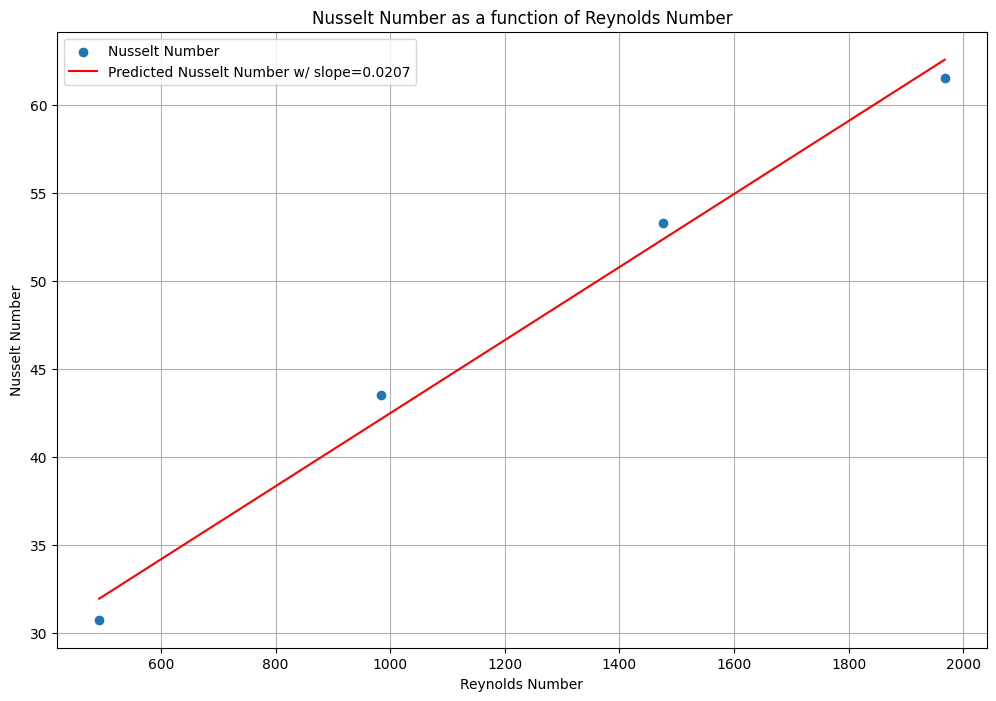

In [16]:
slope, intercept, r_value, p_value, std_err = stats.linregress(dimensionless_df["Reynolds Number"], dimensionless_df['Nusselt Number'])
line = slope * dimensionless_df["Reynolds Number"] + intercept
plt.figure(figsize=(12, 8))
plt.scatter(dimensionless_df["Reynolds Number"], dimensionless_df["Nusselt Number"], label = "Nusselt Number")
plt.plot(dimensionless_df["Reynolds Number"], line, label=f"Predicted Nusselt Number w/ slope={slope:.4f}", color = "red")
plt.title("Nusselt Number as a function of Reynolds Number")
plt.xlabel("Reynolds Number")
plt.ylabel("Nusselt Number")
plt.grid()
plt.legend()

print(f"Slope: {slope:.4f}")
print(f"Standard Error of Slope: {std_err:.4f}")
print(f"Y-intercept: {intercept:.4f}")
print(f"R-squared: {r_value**2:.4f}")
print(f"P-value: {p_value:.4f}")

residuals = calc_vals_df['log(h)'] - line
std_dev = np.std(residuals)
print(f"Standard Deviation of Residuals: {std_dev:.4f}")

Thus, we have:

$$ Nu \ \alpha \ Re ^ {0.0207±0.0015} $$
$$h \ \alpha \ u^{0.3707±0.0422}$$

The heat transfer coefficient gives us a relationship closer to the theoretical expression.

# COMSOL Data Analysis & Report Tasks

### Question 3: 
Plot the axial temperatures along the rod along the centerline (i.e., T(0, z>0)) and compare
them to your experimental values

In [17]:
def get_positions(thermistor_number):
    if thermistor_number == 6:
        return 12.5
    elif thermistor_number == 5:
        return 12.5 + 25.4
    elif thermistor_number == 4:
        return 12.5 + 25.4 + 25.4
    else:
        return None
    
df["positions (mm)"] = df["Thermistor #"].apply(get_positions)

In [18]:
df

,Flow Rate (SCFM),Thermistor #,Temperature 1 (°C),Temperature 2 (°C),Temperature 3 (°C),Avg Temp (°C),positions (mm)
0,1,4,115.8,116.2,NaN,116.000000,63.3
1,1,5,113.6,114.8,NaN,114.200000,37.9
2,1,6,111.7,112.7,NaN,112.200000,12.5
3,2,4,113.3,116.0,115.8,115.033333,63.3
4,2,5,110.8,113.9,113.4,112.700000,37.9
5,2,6,108.4,111.1,111.0,110.166667,12.5
6,3,4,112.0,115.7,114.7,114.133333,63.3
7,3,5,109.1,113.2,111.8,111.366667,37.9
8,3,6,106.3,110.1,108.7,108.366667,12.5
9,4,4,109.0,115.1,NaN,112.050000,63.3


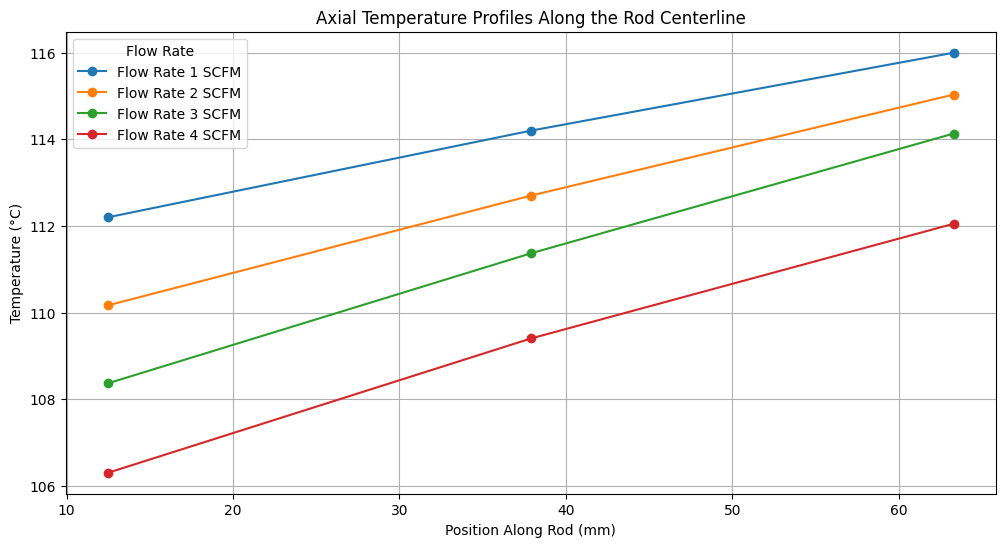

In [19]:
plt.figure(figsize=(12, 6))
flow_rates = df['Flow Rate (SCFM)'].unique()
for flow_rate in flow_rates:
    df_flow = df[df['Flow Rate (SCFM)'] == flow_rate].copy()
    df_flow.sort_values(by=['positions (mm)'], inplace=True)
    
    plt.plot(df_flow['positions (mm)'], df_flow['Avg Temp (°C)'], marker='o', label=f'Flow Rate {flow_rate} SCFM')

plt.title('Axial Temperature Profiles Along the Rod Centerline')
plt.xlabel('Position Along Rod (mm)')
plt.ylabel('Temperature (°C)')
plt.legend(title="Flow Rate")
plt.grid(True)
plt.show()

Reading in COMSOL simulated results to compare our experimental results with simulated results

In [20]:
df_sim_1 = pd.read_csv("data/Heat Transfer Lab COMSOL Data - 1 SCFM Data.csv")
df_sim_2 = pd.read_csv("data/Heat Transfer Lab COMSOL Data - 2 SCFM Data.csv")
df_sim_3 = pd.read_csv("data/Heat Transfer Lab COMSOL Data - 3 SCFM Data.csv")
df_sim_4 = pd.read_csv("data/Heat Transfer Lab COMSOL Data - 4 SCFM Data.csv")

In [21]:
df_sim_1.head()

,r,z,T (K)
0,0.001092,-0.008912,313.091756
1,0.000000,-0.010000,293.600000
2,0.001590,-0.010000,293.600000
3,0.000000,-0.008002,317.777552
4,0.002418,-0.008780,307.997580


Extracting values for z > 0 and r == 0 and sorting by axial position (z)

In [22]:
center_rod_1 = df_sim_1.query("r == 0 and z > 0")
center_rod_2 = df_sim_2.query("r == 0 and z > 0")
center_rod_3 = df_sim_3.query("r == 0 and z > 0")
center_rod_4 = df_sim_4.query("r == 0 and z > 0")

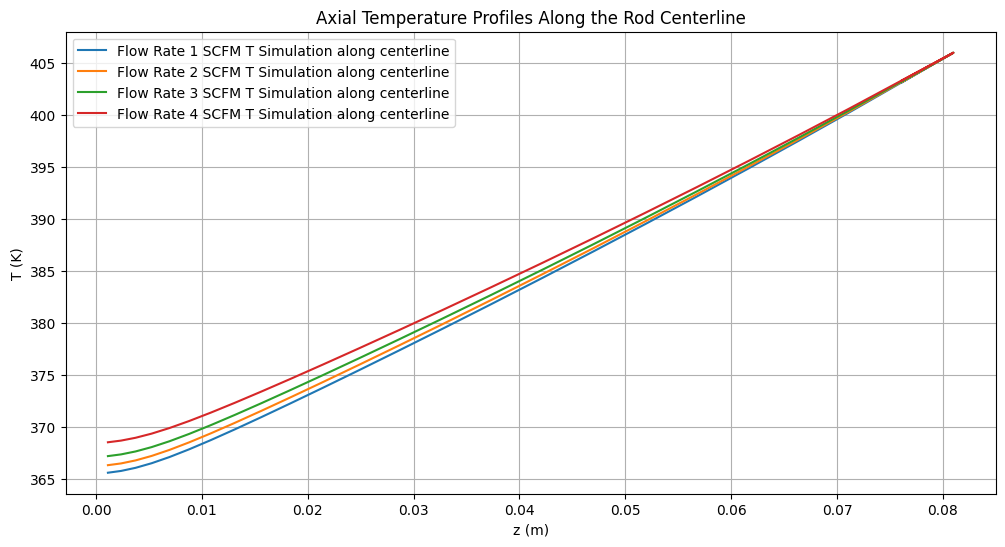

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(center_rod_1['z'], center_rod_1['T (K)'], label = 'Flow Rate 1 SCFM T Simulation along centerline')
plt.plot(center_rod_2['z'], center_rod_2['T (K)'], label = 'Flow Rate 2 SCFM T Simulation along centerline')
plt.plot(center_rod_3['z'], center_rod_3['T (K)'], label = 'Flow Rate 3 SCFM T Simulation along centerline')
plt.plot(center_rod_4['z'], center_rod_4['T (K)'], label = 'Flow Rate 4 SCFM T Simulation along centerline')
plt.xlabel('z (m)')
plt.ylabel('T (K)')
plt.title('Axial Temperature Profiles Along the Rod Centerline')
plt.grid()
plt.legend()
plt.show()

### Question 4:
Heat transfer between the air and the brass rod takes place through the thermal boundary
layer. The boundary layer is the major source of resistance to heat transfer in the gas phase.
Plot the centerline temperature profile in the air as a function of distance from the brass-rod
face (i.e., T(0, z<0)) at varying Vin.

In [24]:
BL_1 = df_sim_1.query("r == 0 and z < 0")
BL_2 = df_sim_2.query("r == 0 and z < 0")
BL_3 = df_sim_3.query("r == 0 and z < 0")
BL_4 = df_sim_4.query("r == 0 and z < 0")

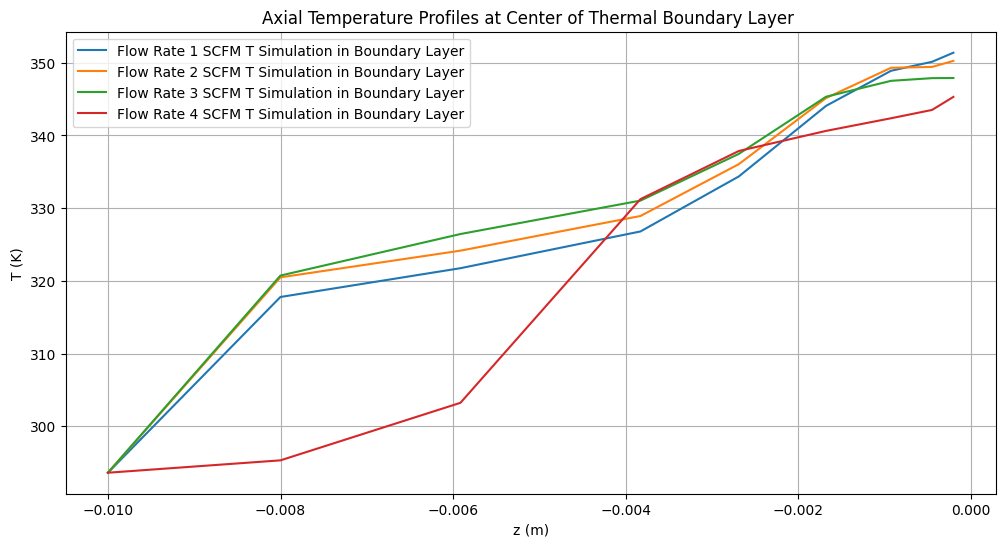

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(BL_1['z'], BL_1['T (K)'], label = 'Flow Rate 1 SCFM T Simulation in Boundary Layer')
plt.plot(BL_2['z'], BL_2['T (K)'], label = 'Flow Rate 2 SCFM T Simulation in Boundary Layer')
plt.plot(BL_3['z'], BL_3['T (K)'], label = 'Flow Rate 3 SCFM T Simulation in Boundary Layer')
plt.plot(BL_4['z'], BL_4['T (K)'], label = 'Flow Rate 4 SCFM T Simulation in Boundary Layer')
plt.xlabel('z (m)')
plt.ylabel('T (K)')
plt.title('Axial Temperature Profiles at Center of Thermal Boundary Layer ')
plt.grid()
plt.legend()
plt.show()

### Question 5
Compute and plot the heat transfer coefficient h vs. distance r along the rod face for each
value of the inlet velocity

In [26]:
rod_face_1 = df_sim_1.query("z == 0")
rod_face_2 = df_sim_2.query("z == 0")
rod_face_3 = df_sim_3.query("z == 0")
rod_face_4 = df_sim_4.query("z == 0")

We know that h is a function of dt/dr, so let's first plot temperature vs radius and see what relationship that has so we can understand how to extract dt/dr from it

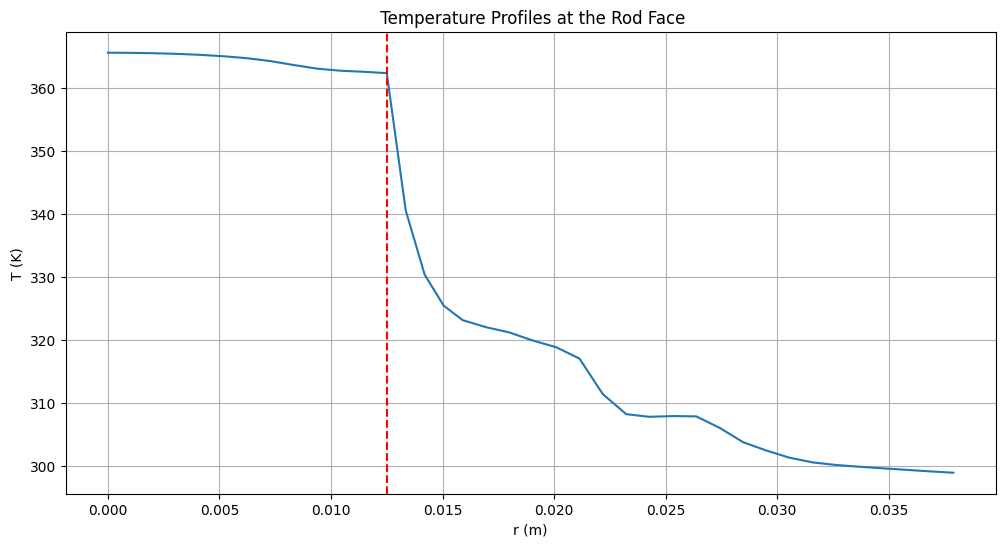

In [27]:
rod_face_1.sort_values(by='r', inplace=True)
slope, intercept, r_value, p_value, std_err = stats.linregress(rod_face_1['r'], rod_face_1['T (K)'])

plt.figure(figsize=(12, 6))
plt.plot(rod_face_1['r'], rod_face_1['T (K)'])
plt.axvline(x=.0125, color='r', linestyle='--')  
plt.xlabel('r (m)')
plt.ylabel('T (K)')
plt.title(' Temperature Profiles at the Rod Face')
plt.grid()
plt.show()

This plot indicates that it is highly non-linear, so what we can try is using a localized first-derivative and plotting against r using that

In [28]:
simulation_dfs = [df_sim_1, df_sim_2, df_sim_3, df_sim_4]
rod_faces = {}

k = 120  # W/m·K
T_e = 20.6 + 273.15  # Kelvin

for i, df in enumerate(simulation_dfs, start=1):
    rod_face = df.query("z == 0").sort_values(by='r')
    r_values = rod_face['r'].values
    T_s = rod_face['T (K)'].values

    dT_dr = np.gradient(T_s, r_values)
    
    h_r = [-k * dT_dr[j] / (T_s[j] - T_e) for j in range(len(T_s))]
    rod_faces[f'rod_face_{i}'] = {'r': r_values, 'h_r': h_r}

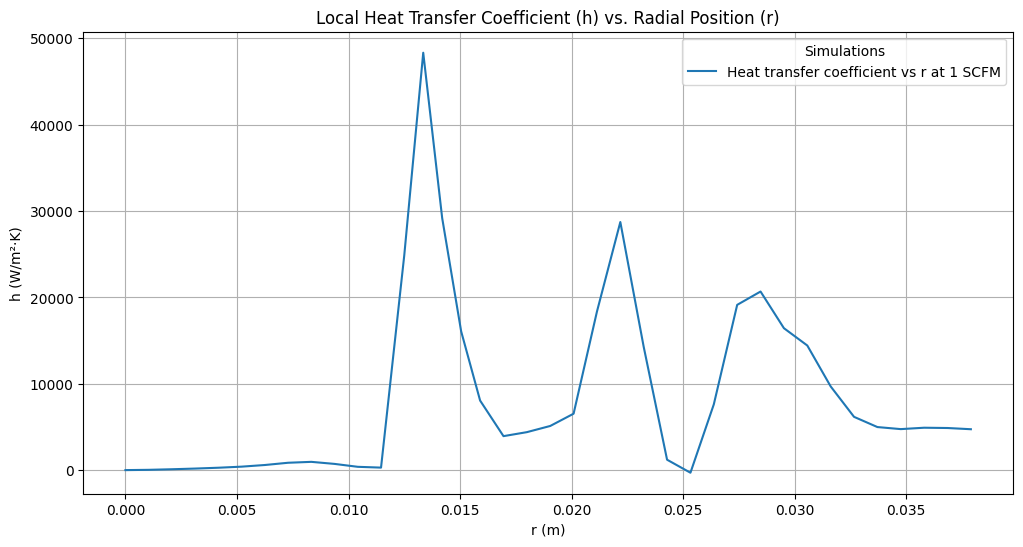

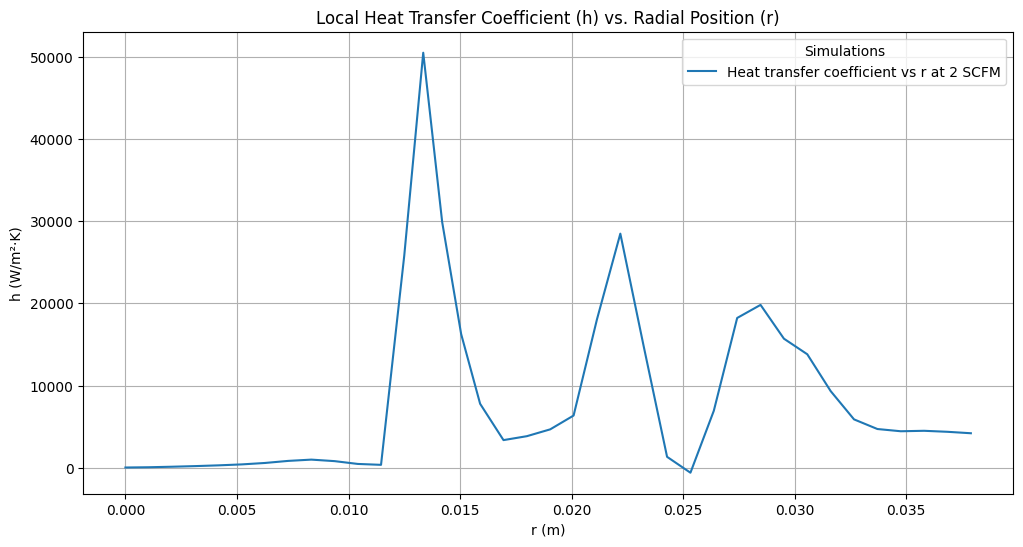

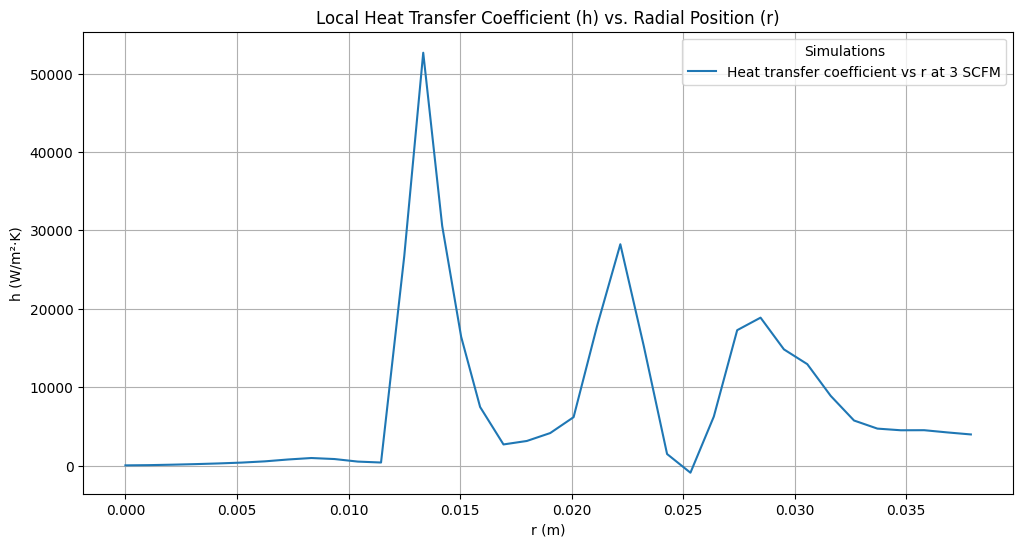

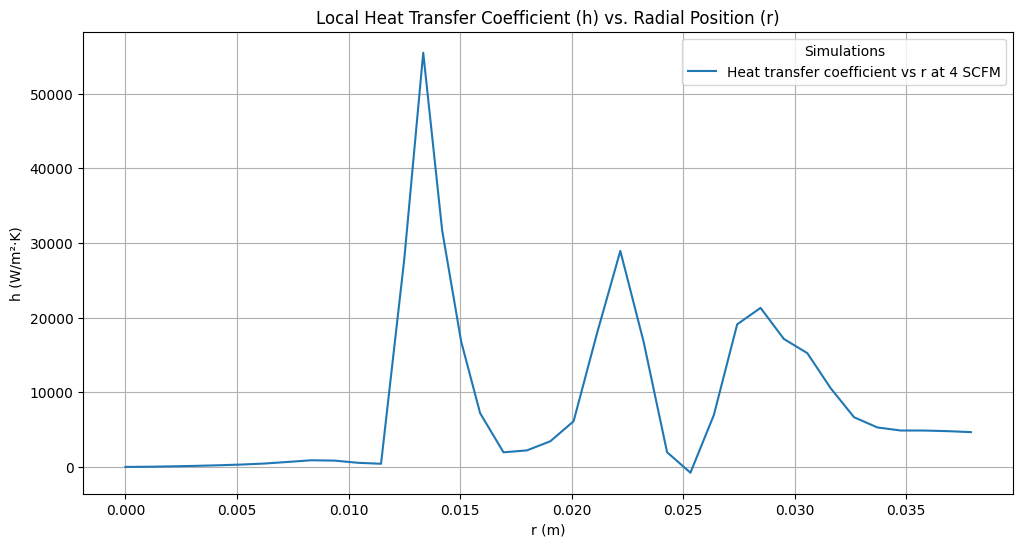

In [29]:
for name, data in rod_faces.items():
    plt.figure(figsize=(12, 6))
    plt.plot(data['r'], data['h_r'], label= "Heat transfer coefficient vs r at " + name.split('_')[2] + " SCFM" )

    plt.xlabel('r (m)')
    plt.ylabel('h (W/m²·K)')
    plt.title('Local Heat Transfer Coefficient (h) vs. Radial Position (r)')
    plt.legend(title="Simulations")
    plt.grid(True)
    plt.show()


These don't seem very interpretable or realistic (50k W/m^2 K is too high)
Instead of a localized first derivative, let's do a polynomial regression

In [30]:
simulation_dfs = [df_sim_1, df_sim_2, df_sim_3, df_sim_4]
rod_faces = {}
poly_degree = 3  # update in testing

for i, df in enumerate(simulation_dfs, start=1):
    rod_face = df.query("z == 0").sort_values(by='r')
    r_values = rod_face['r'].values
    T_s = rod_face['T (K)'].values

    poly_fit = Polynomial.fit(r_values, T_s, poly_degree)
    poly_coeff = poly_fit.convert().coef 

    poly_derivative = Polynomial(poly_coeff).deriv()
    dT_dr = poly_derivative(r_values)
    h_r = [-k * dT_dr[j] / (T_s[j] - T_e) for j in range(len(T_s))]

    rod_faces[f'rod_face_{i}'] = {'r': r_values, 'h_r': h_r}


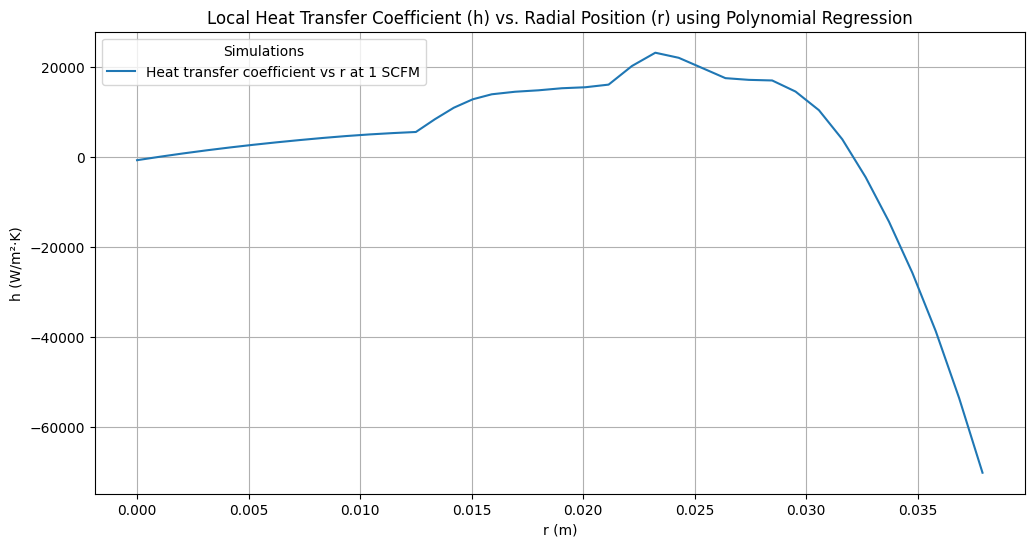

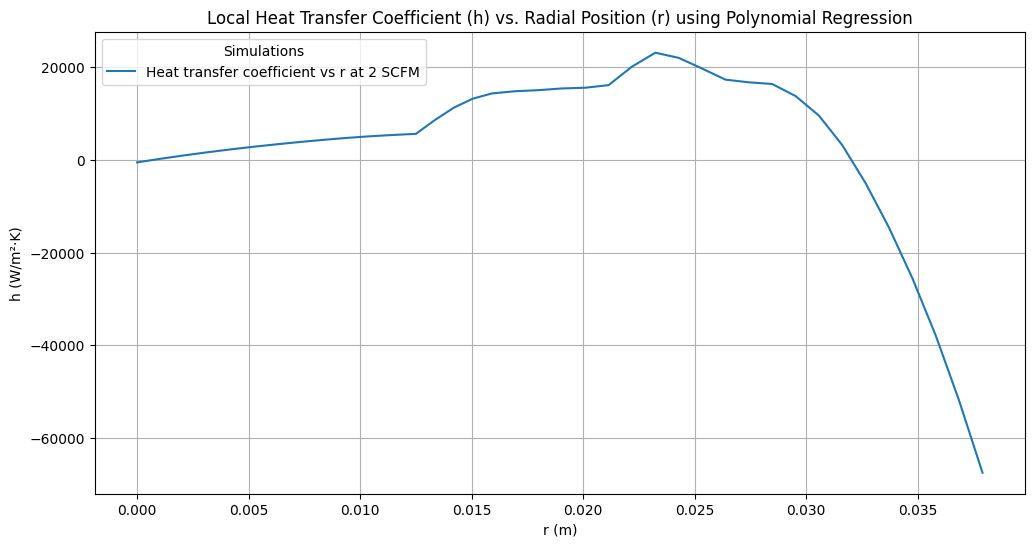

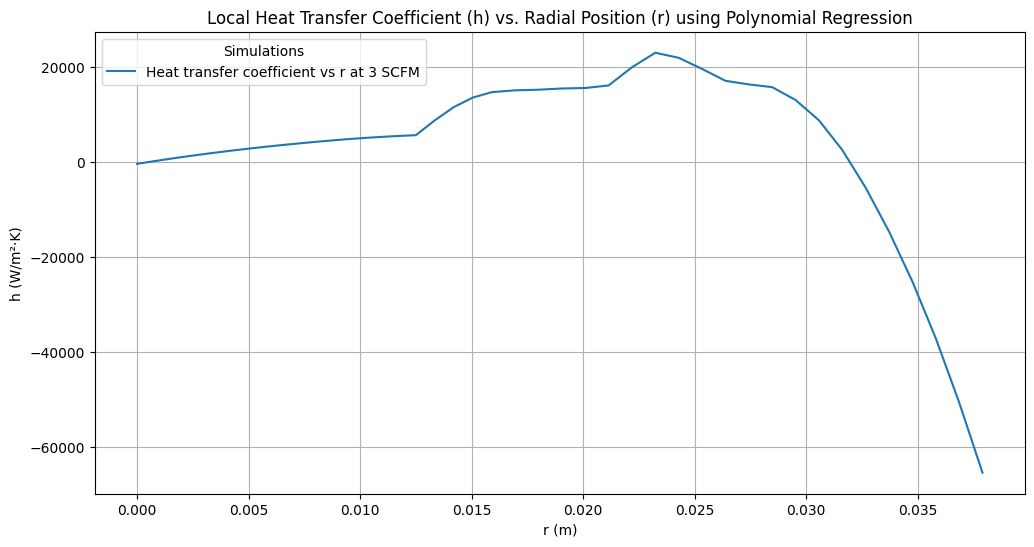

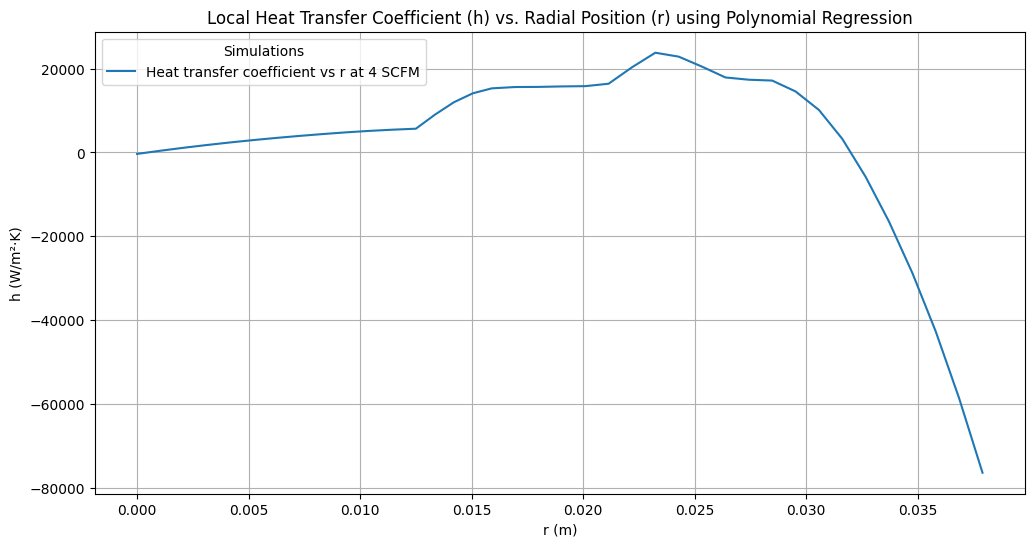

In [31]:
for name, data in rod_faces.items():
    plt.figure(figsize=(12, 6))
    plt.plot(data['r'], data['h_r'], label= "Heat transfer coefficient vs r at " + name.split('_')[2] + " SCFM" )

    plt.xlabel('r (m)')
    plt.ylabel('h (W/m²·K)')
    plt.title('Local Heat Transfer Coefficient (h) vs. Radial Position (r) using Polynomial Regression')
    plt.legend(title="Simulations")
    plt.grid(True)
    plt.show()


These don't make too much sense either, what we should try is partitioning the simulation results by brass and nylon